In [1]:
#####  Full temperature data analysis ##### 

# Contents:
# 1. Data download 
# 2. Data pre-processing (converting binary temperature data to a .csv format and selecting specific data locations (lat = ..., lon = ...))
# 3. Loading the .csv files as new variables
# 4. Setting a "date_time" format as an index for easier analysis 
# 5. Resampling Tmax and Tmin data for mean weekly, monthly, yearly data and Kharif and Rabi season
# 6. Plotting the general temperature trend for Tmax and Tmin
# 7. Plotting the tmax and tmin spread (DTV)
# 8.1 Probability distribution of tmax and tmin values (single plot)
# 8.2.Probability distribution of tmax and tmin values (multiple plots)
# 9.Checking if there are statistically significant differences in the temperature changes for tmax and tmin over the years.
# 10. Monthly temperature change (single plot)
# 10.2 Monthly temperature change (could be adjusted to e.g. weekly) (multiple plots)
# 11.1 Decadal (or different) moving warming rate. Function definition
# 11.2 Plotting decadal warming rate

In [220]:
# Loading libraries
# Reminder, to run this script, first run "Install_requirements.ipynb". For more information, seethe  file "Readme.md"
import imdlib as imd
import os
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress
import statsmodels.formula.api as smf

In [11]:
##### 1. Data download  #####

##### THIS NEEDS TO BE DONE ONLY ONCE TO DOWNLOAD THE DATA #####
# Downloading binary data from IMD
# By doing this, a new folder with downloaded binary data will be created in the folder of this notebook

# Tmax
start_yr = 1951 # Temperature data available from 1951
end_yr = 2024
variable = 'tmax'
file_dir = 'dataimd'
data = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)

# Tmin
start_yr = 1951 # Temperature data available from 1951
end_yr = 2024
variable = 'tmin'
file_dir = 'dataimd'
data = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=file_dir)

##### THIS NEEDS TO BE DONE ONLY ONCE TO DOWNLOAD THE DATA ##### 

Downloading: maxtemp for year 1951
Downloading: maxtemp for year 1952
Downloading: maxtemp for year 1953
Downloading: maxtemp for year 1954
Downloading: maxtemp for year 1955
Downloading: maxtemp for year 1956
Downloading: maxtemp for year 1957
Downloading: maxtemp for year 1958
Downloading: maxtemp for year 1959
Downloading: maxtemp for year 1960
Downloading: maxtemp for year 1961
Downloading: maxtemp for year 1962
Downloading: maxtemp for year 1963
Downloading: maxtemp for year 1964
Downloading: maxtemp for year 1965
Downloading: maxtemp for year 1966
Downloading: maxtemp for year 1967
Downloading: maxtemp for year 1968
Downloading: maxtemp for year 1969
Downloading: maxtemp for year 1970
Downloading: maxtemp for year 1971
Downloading: maxtemp for year 1972
Downloading: maxtemp for year 1973
Downloading: maxtemp for year 1974
Downloading: maxtemp for year 1975
Downloading: maxtemp for year 1976
Downloading: maxtemp for year 1977
Downloading: maxtemp for year 1978
Downloading: maxtemp

In [136]:
##### 2. Data pre-processing  #####

##### THIS NEEDS TO BE DONE ONLY ONCE TO PRE-PROCESS THE DATA #####
# Reading binary datasets downloaded from IMD

# General
start_yr = 1951
end_yr = 2024
file_format = 'yearwise' # other option (None), which will assume default IMD naming convention

# Tmax
variable = 'tmax'
file_dir = 'dataimd/tmax' # Path to the location of the binary dataset
data_tmax = imd.open_data(variable, start_yr, end_yr,'yearwise', file_dir)

#Tmin
variable = 'tmin'
file_dir = 'dataimd/tmin' # Path to the location of the binary dataset
data_tmin = imd.open_data(variable, start_yr, end_yr,'yearwise', file_dir)

##### THIS NEEDS TO BE DONE ONLY ONCE TO PRE-PROCESS THE DATA #####

In [172]:
##### 2. Data pre-processing. Converting binary temperature data to a .csv format and selecting specific data locations  #####

##### THIS NEEDS TO BE DONE ONLY ONCE TO PRE-PROCESS THE DATA #####
# Converting the downloaded data to a .csv format

# This analysis was done for Raichur (lat = 13.25, lon = 77.44) and Chikkaballapur (lat = 16.08, lon = 76.75). 
# In this case, each location had only one temperature data coordinate
# It is possible to select multiple points for each location (latLong = [[lat1,lon1], [lat2,lon2], ... ])


# Chikkaballapur
lat = 13.25 
lon = 77.44 
out_dir= "dataimd"
data_tmax.to_csv('tmax.csv', lat, lon, out_dir)
data_tmin.to_csv('tmin.csv', lat, lon, out_dir)

# Raichur
lat = 16.08
lon = 76.75
out_dir= "dataimd"
data_tmax.to_csv('tmax.csv', lat, lon, out_dir)
data_tmin.to_csv('tmin.csv', lat, lon, out_dir)

##### THIS NEEDS TO BE DONE ONLY ONCE TO PRE-PROCESS THE DATA #####

In [174]:
##### 3. Loading the .csv files as new variables #####
tmax_chik = pd.read_csv("dataimd/tmax_13.25_77.44.csv", delimiter=",")
tmin_chik = pd.read_csv("dataimd/tmin_13.25_77.44.csv", delimiter=",")
tmax_raich = pd.read_csv("dataimd/tmax_16.08_76.75.csv", delimiter=",")
tmin_raich = pd.read_csv("dataimd/tmin_16.08_76.75.csv", delimiter=",")

In [286]:
tmax_chik.isna().any()

Temperature    False
dtype: bool

In [276]:
tmin_chik.isna().any().any()

False

In [278]:
tmin_raich.isna().any().any()

False

In [280]:
tmax_raich.isna().any().any()

False

In [176]:
##### 4. Setting a "date_time" format as an index for easier analysis #####

###########################################
tmax_chik["date_time"] = pd.to_datetime(tmax_chik["DateTime"])
# Set date_time as the index
tmax_chik.set_index("date_time", inplace=True)
# Renaming the column with temperature
tmax_chik.rename(columns={'13.25 77.44': 'Temperature'}, inplace=True)

###########################################
tmin_raich["date_time"] = pd.to_datetime(tmin_raich["DateTime"])
# Set date_time as the index
tmin_raich.set_index("date_time", inplace=True)
# Renaming the column with temperature
tmin_raich.rename(columns={'16.08 76.75': 'Temperature'}, inplace=True)

###########################################
tmin_chik["date_time"] = pd.to_datetime(tmin_chik["DateTime"])
# Set date_time as the index
tmin_chik.set_index("date_time", inplace=True)
# Renaming the column with temperature
tmin_chik.rename(columns={'13.25 77.44': 'Temperature'}, inplace=True)

###########################################
tmax_raich["date_time"] = pd.to_datetime(tmax_raich["DateTime"])
# Set date_time as the index
tmax_raich.set_index("date_time", inplace=True)
# Renaming the column with temperature
tmax_raich.rename(columns={'16.08 76.75': 'Temperature'}, inplace=True)

# Deleting the additional DateTime column 
del tmax_chik['DateTime']
del tmax_raich['DateTime']
del tmin_chik['DateTime']
del tmin_raich['DateTime']


In [290]:
tmax_raich_yearly_mean

,Temperature
date_time,
1951-12-31,32.90
1952-12-31,32.87
1953-12-31,32.50
1954-12-31,32.31
1955-12-31,32.14
...,...
2020-12-31,33.05
2021-12-31,32.64
2022-12-31,32.83


In [296]:
##### 5. Resampling Tmax and Tmin data for mean weekly, monthly and yearly data ##### 

###########################################
tmax_raich_monthly_mean = tmax_raich.resample("ME").mean()
tmax_raich_weekly_mean = tmax_raich.resample("W").mean()
tmax_raich_yearly_mean = tmax_raich.resample("YE").mean()

tmax_chik_monthly_mean = tmax_chik.resample("ME").mean()
tmax_chik_weekly_mean = tmax_chik.resample("W").mean()
tmax_chik_yearly_mean = tmax_chik.resample("YE").mean()

###########################################

# Resampling Tmax data for maximum weekly, monthly and yearly data

###########################################
tmax_raich_monthly_max = tmax_raich.resample("ME").max()
tmax_raich_weekly_max = tmax_raich.resample("W").max()
tmax_raich_yearly_max = tmax_raich.resample("YE").max()

tmax_chik_monthly_max  = tmax_chik.resample("ME").max()
tmax_chik_weekly_max = tmax_chik.resample("W").max()
tmax_chik_yearly_max = tmax_chik.resample("YE").max()

###########################################

# Resampling Tmax data for minimum weekly, monthly and yearly data

###########################################
tmax_raich_monthly_min = tmax_raich.resample("ME").min()
tmax_raich_weekly_min = tmax_raich.resample("W").min()
tmax_raich_yearly_min = tmax_raich.resample("YE").min()

tmax_chik_monthly_min  = tmax_chik.resample("ME").min()
tmax_chik_weekly_min = tmax_chik.resample("W").min()
tmax_chik_yearly_min = tmax_chik.resample("YE").min()

# Resampling Tmin data for mean weekly, monthly and yearly data

###########################################
tmin_raich_monthly_mean = tmin_raich.resample("ME").mean()
tmin_raich_weekly_mean = tmin_raich.resample("W").mean()
tmin_raich_yearly_mean = tmin_raich.resample("YE").mean()

tmin_chik_monthly_mean = tmin_chik.resample("ME").mean()
tmin_chik_weekly_mean = tmin_chik.resample("W").mean()
tmin_chik_yearly_mean = tmin_chik.resample("YE").mean()

###########################################

# Resampling Tmin data for minimum weekly, monthly and yearly data

###########################################
tmin_raich_monthly_max = tmin_raich.resample("ME").max()
tmin_raich_weekly_max = tmin_raich.resample("W").max()
tmin_raich_yearly_max = tmin_raich.resample("YE").max()

tmin_chik_monthly_max = tmin_chik.resample("ME").max()
tmin_chik_weekly_max = tmin_chik.resample("W").max()
tmin_chik_yearly_max = tmin_chik.resample("YE").max()

###########################################

# Resampling Tmin data for minimum weekly, monthly and yearly data

###########################################
tmin_raich_monthly_min = tmin_raich.resample("ME").min()
tmin_raich_weekly_min = tmin_raich.resample("W").min()
tmin_raich_yearly_min = tmin_raich.resample("YE").min()

tmin_chik_monthly_min = tmin_chik.resample("ME").min()
tmin_chik_weekly_min = tmin_chik.resample("W").min()
tmin_chik_yearly_min = tmin_chik.resample("YE").min()

###########################################
# Extracting the seasonal data

tmax_raich_kharif = tmax_raich[(tmax_raich.index.month >= 6) & (tmax_raich.index.month <= 10)]
tmax_chik_kharif = tmax_chik[(tmax_chik.index.month >= 6) & (tmax_chik.index.month <= 10)]

rabi_months_mask_raich = tmax_raich.index.month.isin([11, 12, 1, 2, 3, 4]) # Beggining and end of the year, so I need to use a mask, instead of simple filtering
tmax_raich_rabi = tmax_raich.loc[rabi_months_mask_raich]

rabi_months_mask_chik = tmax_chik.index.month.isin([11, 12, 1, 2, 3, 4]) # Beggining and end of the year, so I need to use a mask, instead of simple filtering
tmax_chik_rabi = tmax_chik.loc[rabi_months_mask_chik]


tmin_raich_kharif = tmin_raich[(tmin_raich.index.month >= 6) & (tmin_raich.index.month <= 10)]
tmin_chik_kharif = tmin_chik[(tmin_chik.index.month >= 6) & (tmin_chik.index.month <= 10)]


rabi_months_mask_raich = tmax_raich.index.month.isin([11, 12, 1, 2, 3, 4]) # Beggining and end of the year, so I need to use a mask, instead of simple filtering
tmin_raich_rabi = tmin_raich.loc[rabi_months_mask_raich]

rabi_months_mask_chik = tmax_chik.index.month.isin([11, 12, 1, 2, 3, 4]) # Beggining and end of the year, so I need to use a mask, instead of simple filtering
tmin_chik_rabi = tmin_chik.loc[rabi_months_mask_chik]

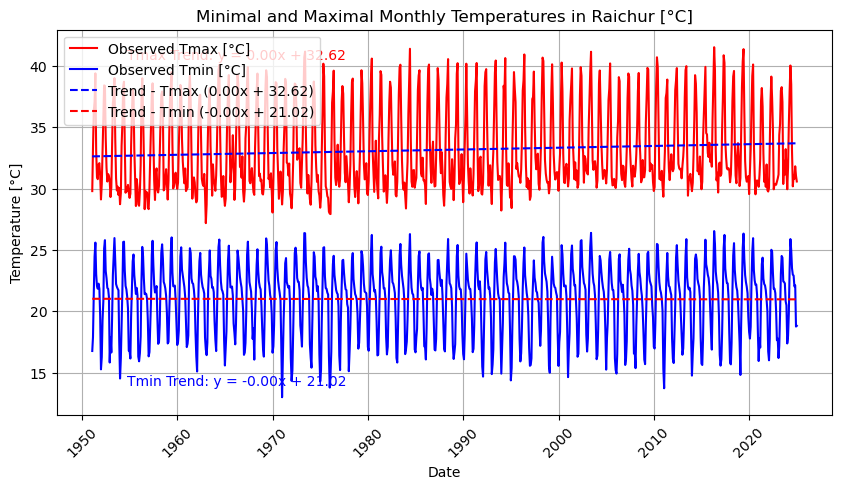

In [366]:
##### 6. Plotting the general temperature trend for Tmax and Tmin ##### 

# Available time options: yearly, monthly, weekly, daily and seasonally (Kharif and Rabi seasons) (for daily and seasonal use: e.g.: tmax_raich, tmin_chik)
# Available values for options: yearly, monthly, weekly:
#                                                      Tmax: mean Tmax, max Tmax, min Tmax
#                                                      Tmin: mean Tmin, max Tmin, min Tmin
    

##### Plotting settings. Choose available time option and value for Tmax and Timn. In this example mean of monthly Tmax and Tmin for Raichur was selected
tmax = tmax_raich_monthly_mean
tmin = tmin_raich_monthly_mean
location = "Raichur" # Raichur or Chikkaballapur for this analysis. This will update the plot title
time_option = "Month" # Year, Month, Week
##### End of plotting settings

# Calculating the trend line
tmax_coeffs = np.polyfit(range(len(tmax)), tmax['Temperature'], 1)
tmin_coeffs = np.polyfit(range(len(tmin)), tmin['Temperature'], 1)

tmax_fit = np.poly1d(tmax_coeffs)
tmin_fit = np.poly1d(tmin_coeffs)

# Plotting the observed temperatures
plt.figure(figsize=(10,5))
plt.plot(tmax.index, tmax['Temperature'], label='Observed Tmax [°C]', color='red')
plt.plot(tmin.index, tmin['Temperature'], label='Observed Tmin [°C]', color='blue')

# Plot the trend lines
plt.plot(tmax.index, tmax_fit(range(len(tmax))), linestyle='dashed', color='blue', label=f'Trend - Tmax ({tmax_coeffs[0]:.2f}x + {tmax_coeffs[1]:.2f})')
plt.plot(tmin.index, tmin_fit(range(len(tmin))), linestyle='dashed', color='red', label=f'Trend - Tmin ({tmin_coeffs[0]:.2f}x + {tmin_coeffs[1]:.2f})')

# Formatting the plot
plt.title(f"Minimal and Maximal {time_option}ly Temperatures in {location} [°C]")
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the equation on the plot
plt.text(tmax.index[int(len(tmax) * 0.05)], 
         max(tmax['Temperature']) - 1, 
         f"Tmax Trend: y = {tmax_coeffs[0]:.2f}x + {tmax_coeffs[1]:.2f}", 
         color="red", fontsize=10)

plt.text(tmin.index[int(len(tmin) * 0.05)], 
         min(tmin['Temperature']) + 1, 
         f"Tmin Trend: y = {tmin_coeffs[0]:.2f}x + {tmin_coeffs[1]:.2f}", 
         color="blue", fontsize=10)

plt.show()


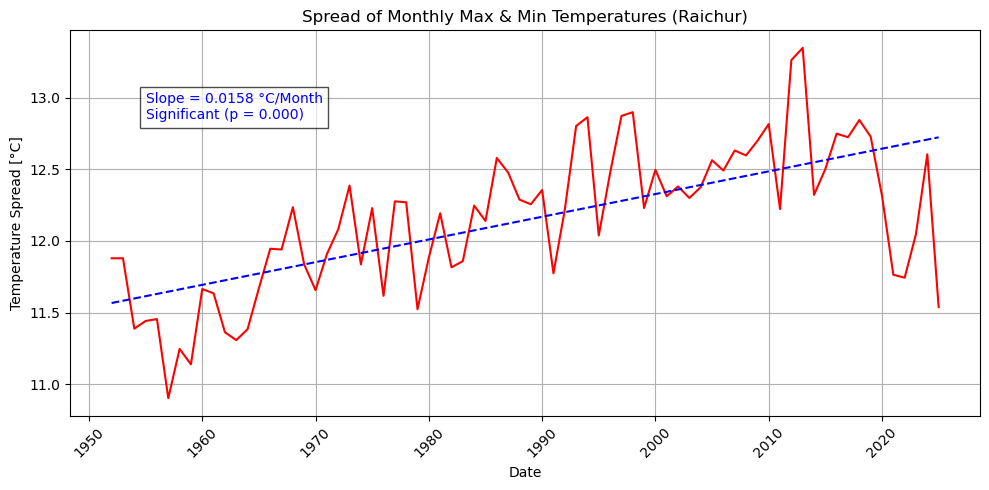

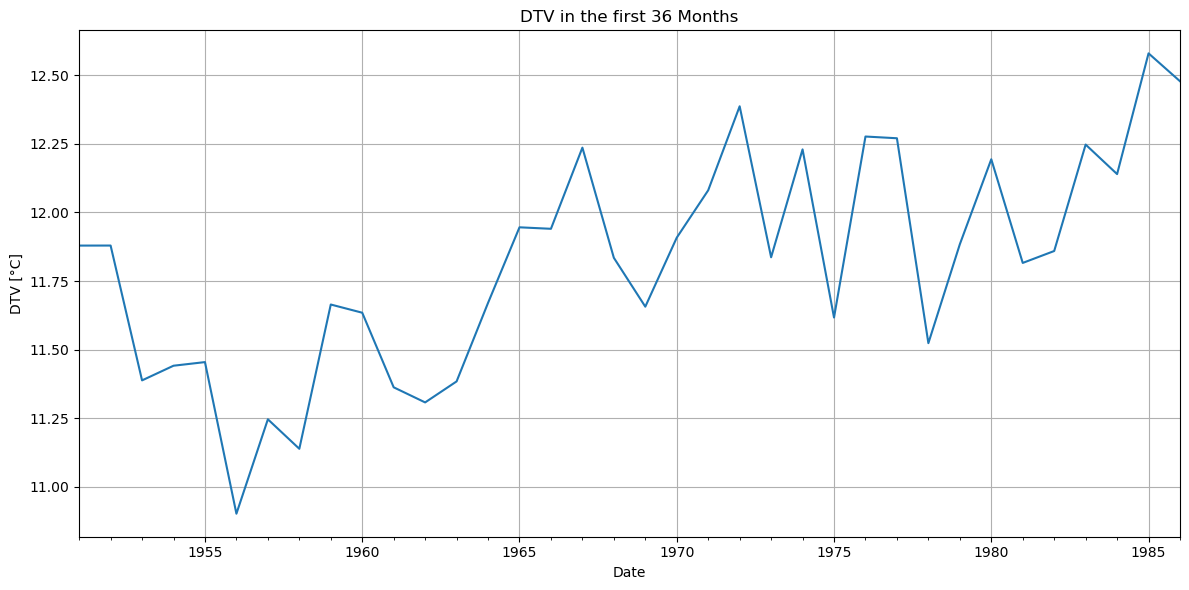

In [372]:
##### 7. Plotting the tmax and tmin spread (DTV) ##### 

# Available time options: yearly, mothly, weekly, daily
# Available values:
#                 Tmax: mean Tmax, max Tmax, min Tmax
#                 Tmin: mean Tmin, max Tmin, min Tmin


##### Plotting settings. Choose the available time option and value for Tmax and Timn. In this example mean of monthly Tmax and Tmin for Raichur was selected
tmax = tmax_raich_yearly_mean
tmin = tmin_raich_yearly_mean
location = "Raichur" # Raichur or Chikkaballapur for this analysis. This will update the plot title
time_option = "Month" # Year, Month, Week
units = 36 # For how many first years/ months/ weeks DTV should be shown in the 2nd plot
##### End of plotting settings

spread = tmax - tmin

x = np.arange(len(spread))
y = spread['Temperature'].values

# Fit linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trend_line = intercept + slope * x

# Plot the observed spread
plt.figure(figsize=(10, 5))
plt.plot(spread.index, y, label=f'Observed {time_option} temperature spread\n(tmax - tmin)', color='red')

# Plot the trend line
plt.plot(spread.index, trend_line, linestyle='dashed', color='blue', 
         label=f'Trend line: y = {slope:.2f}x + {intercept:.2f} (p = {p_value:.3f})')

# Formatting
plt.title(f"Spread of {time_option}ly Max & Min Temperatures ({location})")
plt.xlabel('Date')
plt.ylabel('Temperature Spread [°C]')
plt.xticks(rotation=45)
plt.grid(True)

# Show slope and significance in the plot
plt.text(spread.index[int(len(spread) * 0.05)], 
         max(y) - 0.5, 
         f"Slope = {slope:.4f} °C/{time_option}\n{'Significant' if p_value < 0.05 else 'Not significant'} (p = {p_value:.3f})", 
         color="blue", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

spread.head(units).plot(figsize=(12, 6), legend=False)
plt.title(f'DTV in the first {units} {time_option}s')
plt.xlabel('Date')
plt.ylabel('DTV [°C]')
plt.grid(True)
plt.tight_layout()
plt.show()

Summary Statistics (1951-1971):
count   7306.00
mean      32.68
std        3.71
min       23.07
25%       29.89
50%       31.67
75%       35.39
max       42.54
Name: Temperature, dtype: float64

Summary Statistics (2004-2024):
count   7671.00
mean      33.48
std        3.66
min       24.05
25%       30.82
50%       32.47
75%       36.11
max       43.73
Name: Temperature, dtype: float64

T-test results: t-statistic = -13.246, p-value = 0.00000


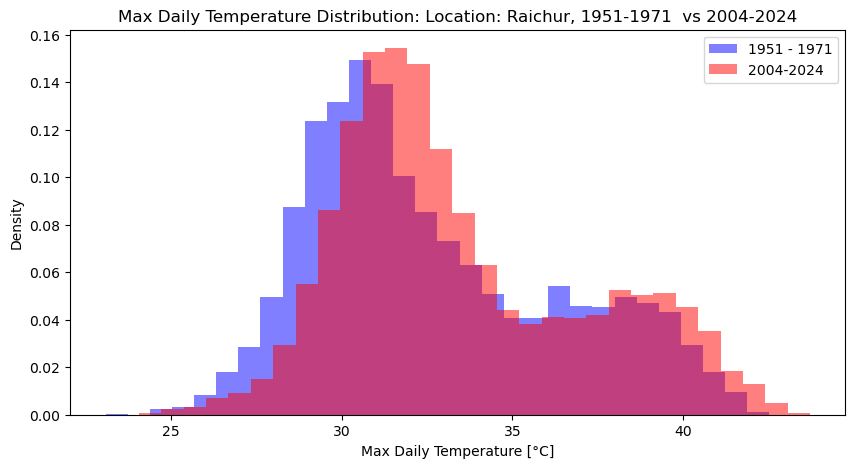

In [376]:
##### 8.1. Probability distribution of tmax and tmin values ##### 
# Single plot

##### Plotting settings
t = tmax_raich # Temperature dataset
t_type = "Max" # Max or Min. Will be used to update the name of the plot
location = "Raichur"
# In this plot, two time periods (e.g. the first two and last decades) of the dataset are compared.
first_start = "1951-01-01" # first_start is the beginning of the first period
first_end = "1971-01-01" # end of the first period
last_start = "2004-01-01" # beginning of the last period
last_end = "2024-12-31" # end of last period
##### End of plotting settings


# Slice the first and last decades
t_first = t.loc[first_start:first_end]
t_last = t.loc[last_start:last_end]

# Extract temperature values
temps_first = t_first["Temperature"]
temps_last = t_last["Temperature"]

# Compute summary statistics
summary_first = temps_first.describe()
summary_last = temps_last.describe()

# Perform an independent t-test (Welch’s t-test for unequal variances)
t_stat, p_value = stats.ttest_ind(temps_first, temps_last, equal_var=False)

# Print summary statistics and test results
print("Summary Statistics (1951-1971):")
print(summary_first)
print("\nSummary Statistics (2004-2024):")
print(summary_last)
print(f"\nT-test results: t-statistic = {t_stat:.3f}, p-value = {p_value:.5f}")

# Plot histograms
plt.figure(figsize=(10,5))
plt.hist(temps_first, bins=30, alpha=0.5, label=f"{first_start[:4]} - {first_end[:4]}", color="blue", density=True)
plt.hist(temps_last, bins=30, alpha=0.5, label=f"{last_start[:4]}-{last_end[:4]}", color="red", density=True)
plt.xlabel(f"{t_type} Daily Temperature [°C]")
plt.ylabel("Density")
plt.title(f"{t_type} Daily Temperature Distribution: Location: {location}, {first_start[:4]}-{first_end[:4]}  vs {last_start[:4]}-{last_end[:4]}")
plt.legend()
plt.show()

In [308]:
tmax_raich_kharif

,Temperature
date_time,
1951-06-01,34.63
1951-06-02,34.68
1951-06-03,34.61
1951-06-04,36.22
1951-06-05,36.14
...,...
2024-10-27,32.60
2024-10-28,32.74
2024-10-29,32.89


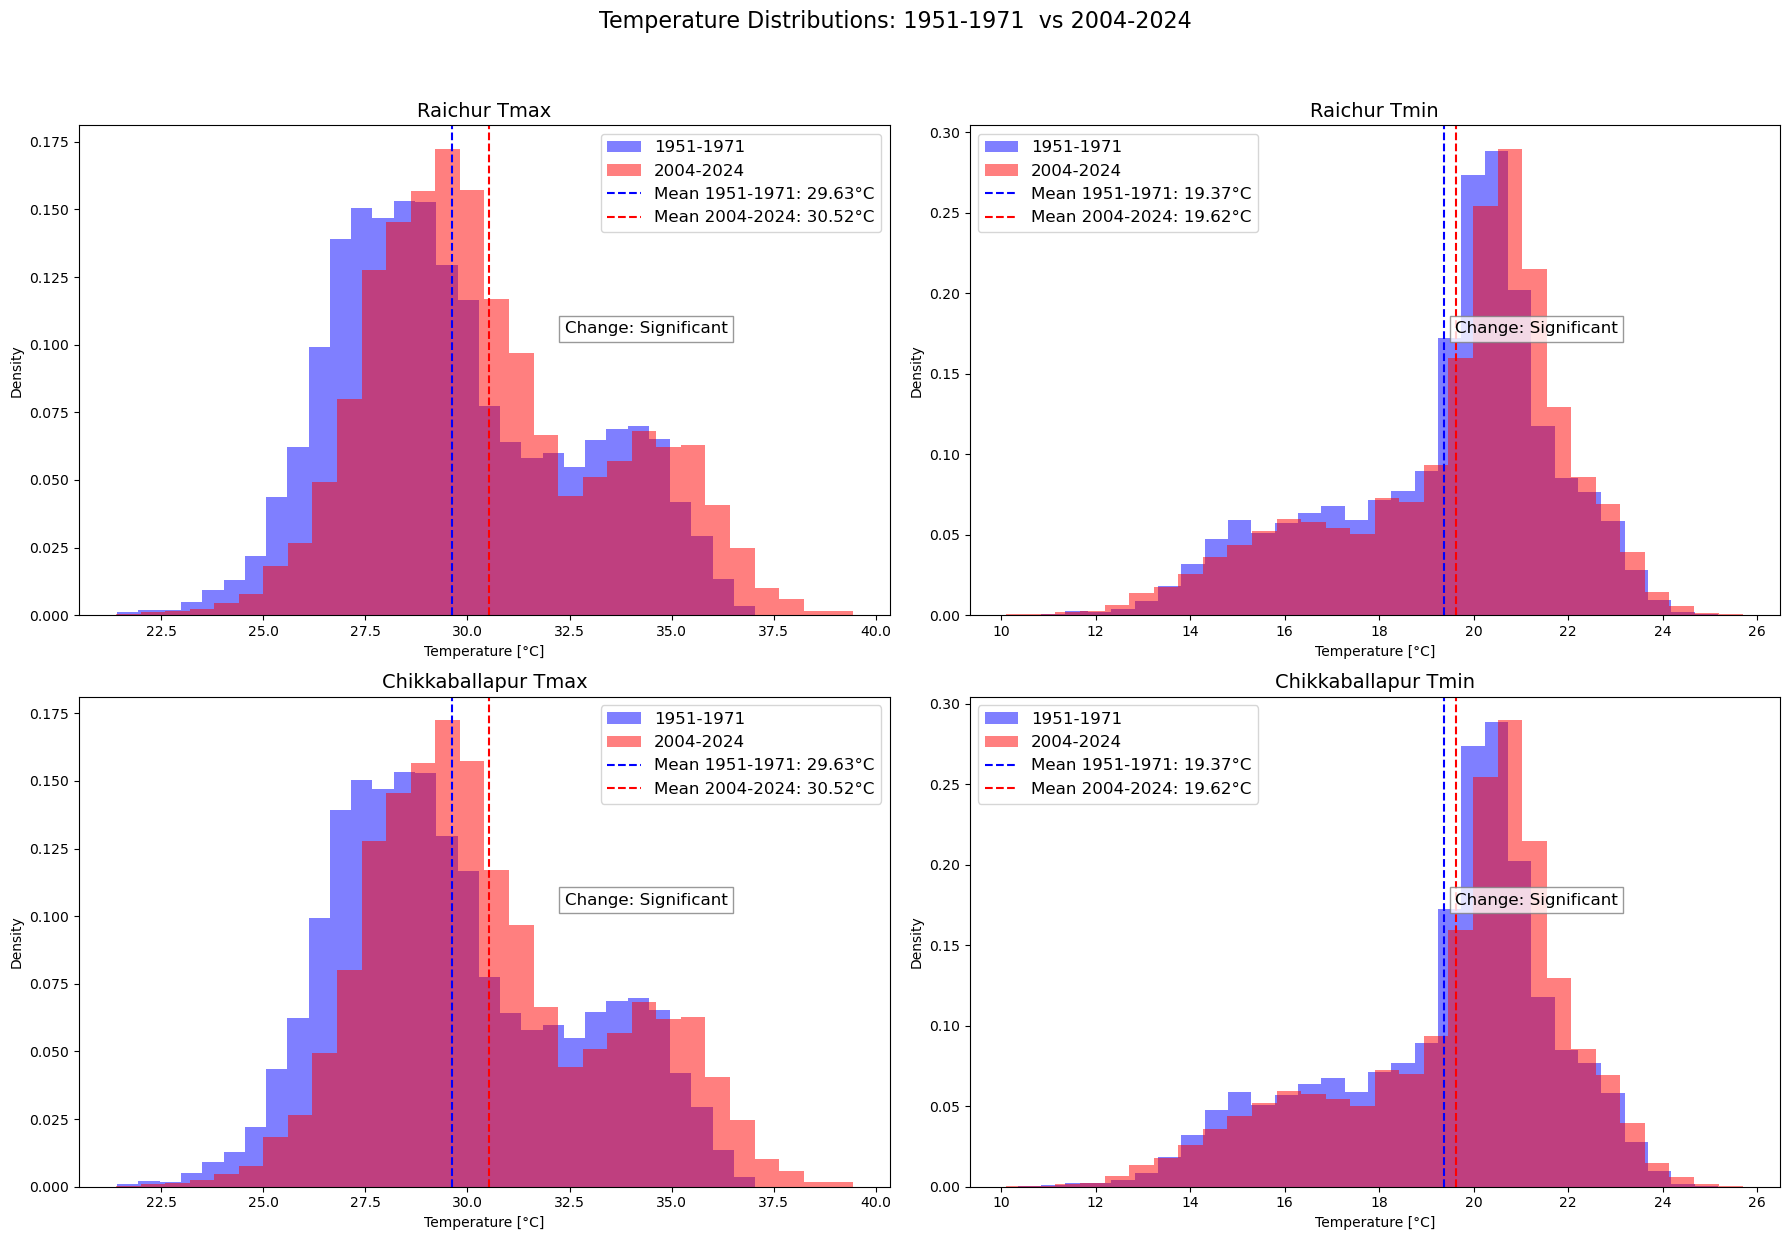


Summary Statistics Table:

         Location/Type     Period  mean  std   min   25%   50%   75%   max  \
0         Raichur Tmax  1951-1971 29.63 2.92 21.42 27.42 29.09 31.75 37.05   
1         Raichur Tmax  2004-2024 30.52 2.92 21.39 28.40 29.97 32.40 39.44   
2         Raichur Tmin  1951-1971 19.37 2.38 10.36 18.01 19.98 20.88 25.17   
3         Raichur Tmin  2004-2024 19.62 2.45 10.11 18.35 20.30 21.18 25.70   
4  Chikkaballapur Tmax  1951-1971 29.63 2.92 21.42 27.42 29.09 31.75 37.05   
5  Chikkaballapur Tmax  2004-2024 30.52 2.92 21.39 28.40 29.97 32.40 39.44   
6  Chikkaballapur Tmin  1951-1971 19.37 2.38 10.36 18.01 19.98 20.88 25.17   
7  Chikkaballapur Tmin  2004-2024 19.62 2.45 10.11 18.35 20.30 21.18 25.70   

   T-stat  P-value  
0     NaN      NaN  
1  -18.49     0.00  
2     NaN      NaN  
3   -6.25     0.00  
4     NaN      NaN  
5  -18.49     0.00  
6     NaN      NaN  
7   -6.25     0.00  


In [378]:
##### 8.2 Probability distribution of tmax and tmin values ##### 
# Multiple plots (tmax/tmin Raichur/Chikkaballapur)

##### Plotting settings
# Options: Data from all years (e.g. tmax_raich), monthly data (e.g. tmax_raich_monthly_mean) or seasonal data (tmax_raich_kharif)
tmax_location1 = tmax_raich 
tmin_location1 = tmin_raich 
tmax_location1 = tmax_chik
tmin_location1 = tmin_chik 

location1 = "Raichur"
location2 = "Chikkaballapur"

# In this plot, two time periods (e.g. the first two and last decades) of the dataset are compared.
first_start = "1951-01-01" # first_start is the beginning of the first period
first_end = "1971-01-01" # end of the first period
last_start = "2004-01-01" # beginning of the last period
last_end = "2024-12-31" # end of last period
##### End of plotting settings


# Datasets: label and dataframe
datasets = {
    f"{location1} Tmax": tmax_location1,
    f"{location1} Tmin": tmin_location1,
    f"{location2} Tmax": tmax_location1,
    f"{location2} Tmin": tmin_location1
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(18, 13))
fig.suptitle(f"Temperature Distributions: {first_start[:4]}-{first_end[:4]}  vs {last_start[:4]}-{last_end[:4]}", fontsize=16)

summary_data = []

for ax, (label, df) in zip(axs.ravel(), datasets.items()):
    temps_first = df.loc[first_start:first_end]["Temperature"]
    temps_last = df.loc[last_start:last_end]["Temperature"]

    mean_first = temps_first.mean()
    mean_last = temps_last.mean()

    # Descriptive statistics
    summary_first = temps_first.describe()
    summary_last = temps_last.describe()

    # T-test
    t_stat, p_value = stats.ttest_ind(temps_first, temps_last, equal_var=False)
    significance = "Significant" if p_value < 0.05 else "Not Significant"

    # Append to summary
    summary_data.append({
        "Location/Type": label,
        "Period": f"{first_start[:4]}-{first_end[:4]}",
        **summary_first.to_dict(),

    })
    summary_data.append({
        "Location/Type": label,
        "Period": f"{last_start[:4]}-{last_end[:4]}",
        **summary_last.to_dict(),
        "T-stat": t_stat,
        "P-value": p_value
    })

    # Plot histograms
    ax.hist(temps_first, bins=30, alpha=0.5, label=f"{first_start[:4]}-{first_end[:4]}", color="blue", density=True)
    ax.hist(temps_last, bins=30, alpha=0.5, label=f"{last_start[:4]}-{last_end[:4]}", color="red", density=True)

    # Plot mean lines
    ax.axvline(mean_first, color="blue", linestyle="--", label=f"Mean {first_start[:4]}-{first_end[:4]}: {mean_first:.2f}°C")
    ax.axvline(mean_last, color="red", linestyle="--", label=f"Mean {last_start[:4]}-{last_end[:4]}: {mean_last:.2f}°C")

    # Annotate significance
    ax.text(0.8, 0.6, f"Change: {significance}", transform=ax.transAxes,
            ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

    ax.set_title(label,fontsize=14)
    ax.set_xlabel("Temperature [°C]")
    ax.set_ylabel("Density")
    ax.legend(fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Create summary table
summary_df = pd.DataFrame(summary_data)
pd.set_option("display.float_format", lambda x: f"{x:0.2f}")
print("\nSummary Statistics Table:\n")
print(summary_df[[
    "Location/Type", "Period", "mean", "std", "min", "25%", "50%", "75%", "max", "T-stat", "P-value"
]])


In [310]:
##### 9. Checking if there are statistically significant differences in the temperature changes for tmax and tmin over the years. #####
# Settings
tmax = tmax_raich # Raichur or Chikkaballapur
tmin = tmin_raich # Raichur or Chikkaballapur
# End settings

# Reset index to get date as a column
tmax_reg = tmax.rename(columns={tmax.columns[0]: 'Temperature'}).copy()
tmin_reg = tmin.rename(columns={tmin.columns[0]: 'Temperature'}).copy()

tmax['Date'] = tmax.index # Adds a "Date" column based on the date_time type index
tmin['Date'] = tmin.index # Adds a "Date" column based on the date_time type index

tmax['Type'] = 'Max' # Adds a "Type" column to distinguish between max and min temperature records
tmin['Type'] = 'Min' # Adds a "Type" column to distinguish between max and min temperature records

# Combine
combined = pd.concat([tmax, tmin]) # Combines both datasets into one for easier modeling and plotting
combined['Year'] = combined['Date'].dt.year # Extracts year from date
combined['DayOfYear'] = combined['Date'].dt.dayofyear # Gets day of the year
combined['DateOrdinal'] = combined['Date'].map(pd.Timestamp.toordinal) # Converts date into a continuous integer (used for regression)

model = smf.ols('Temperature ~ DateOrdinal * Type', data=combined).fit() # regression using statsmodels.formula.api
print(model.summary())

# Long-term trends in temperature.
# If the slope (DateOrdinal) is positive, it suggests warming over time.
# The interaction tells if Min and Max temps are changing at different rates.

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     363.6
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           8.45e-81
Time:                        19:49:31   Log-Likelihood:            -1.4833e+05
No. Observations:               54058   AIC:                         2.967e+05
Df Residuals:                   54056   BIC:                         2.967e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.4457      1.505      2.954      

In [314]:
# # Summary, how to understand the example ressult 
# Metric	Value	Interpretation
# R-squared	0.007	Only 0.7% of the temperature variation is explained by the model. This is very low, meaning the linear trend with time explains very little of what's going on.
# Adj. R-squared	0.007	Same as R² here, since only one predictor.
# F-statistic	363.6	Tests whether the model as a whole is statistically significant. High value means yes.
# Prob (F-statistic)	8.45e-81	This is very significant (much less than 0.05), so the relationship between DateOrdinal and Temperature is statistically significant, but...
# No. Observations	54,058	A large dataset — so even small effects become statistically significant.
# Durbin-Watson	0.078	Indicates very strong autocorrelation in residuals. A value near 2 is good; ~0 is bad. This is a problem.
# AIC/BIC	Model fit metrics; lower is better — not useful here unless comparing multiple models.

# Intercept	4.4457	0.003	The expected temperature when DateOrdinal = 0 (Jan 1 of year 1 CE). Not meaningful practically — just a mathematical anchor.
# DateOrdinal	3.955e-05	0.000	Each day, temperature increases by ~0.00004°C. Over a year (365 days), this is ~0.0145°C increase/year — a tiny upward trend. But it's statistically significant due to large sample size.

C:\Users\48512\AppData\Local\Temp\ipykernel_27664\3014622634.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_t_first = t_first.groupby('month')['Temperature'].mean()
C:\Users\48512\AppData\Local\Temp\ipykernel_27664\3014622634.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_t_last = t_last.groupby('month')['Temperature'].mean()
C:\Users\48512\AppData\Local\Temp\ipykernel_27664\3014622634.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(avg_t_first.index, rotation=45)


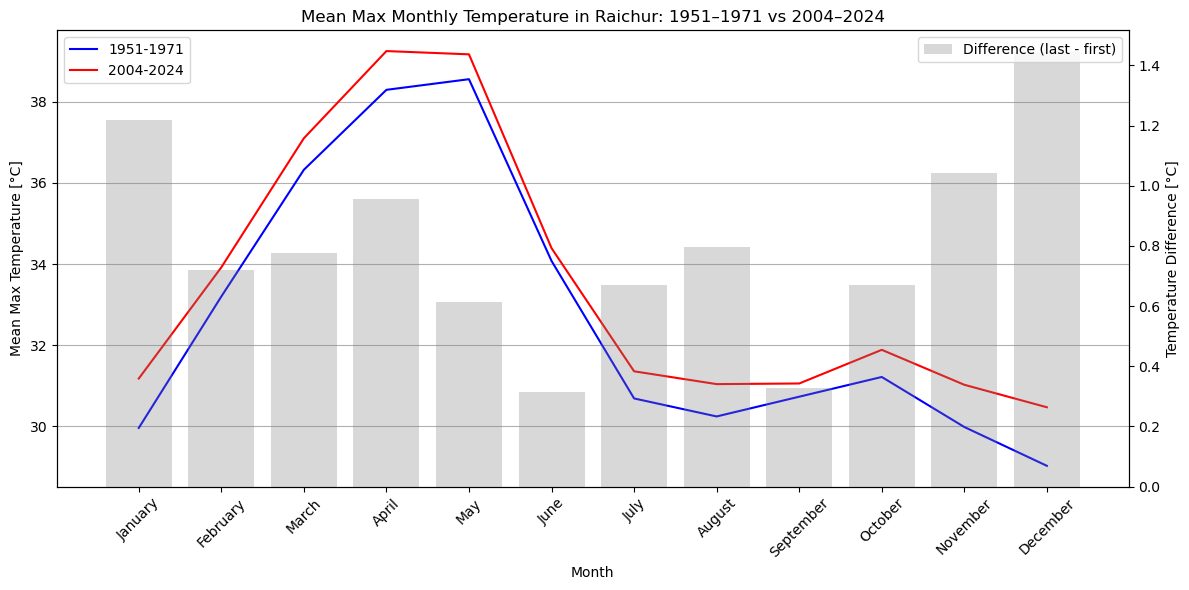

In [334]:
##### 10.1 Monthly temperature change (could be adjusted to e.g. weekly) (single plot)

# Settings

##### Plotting settings
t = tmax_raich_monthly_mean  # Temperature dataset
t_type = "Max" # Max or Min. Will be used to update the name of the plot
location = "Raichur"

# In this plot, two time periods (e.g. the first two and last decades) of the dataset are compared. Here, two decades are compared
first_start = "1951-01-01" # first_start is the beginning of the first period
first_end = "1971-01-01" # end of the first period
last_start = "2004-01-01" # beginning of the last period
last_end = "2024-12-31" # end of last period
##### End of plotting settings

# Extracting the monthly values for the first and last x years of observations
t_first = t[(t.index >= first_start) & (t.index <= first_end)].copy()
t_last = t[(t.index >= last_start) & (t.index<= last_end )].copy()

# Adding "month" column

t_first['month'] = t_first.index.month_name()
t_last['month'] = t_last.index.month_name()


# To keep calendar order:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

t_first['month'] = pd.Categorical(t_first['month'], categories=month_order, ordered=True)
t_last['month'] = pd.Categorical(t_last['month'], categories=month_order, ordered=True)


# Monthly averages in the first and last x years

avg_t_first = t_first.groupby('month')['Temperature'].mean()
avg_t_last = t_last.groupby('month')['Temperature'].mean()

# Calculate difference
temp_diff = avg_t_last - avg_t_first

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plots for both decades
ax1.plot(avg_t_first.index, avg_t_first, label=f"{first_start[:4]}-{first_end[:4]}", color='blue')
ax1.plot(avg_t_last.index, avg_t_last, label=f"{last_start[:4]}-{last_end[:4]}", color='red')
ax1.set_ylabel(f'Mean {t_type} Temperature [°C]')
ax1.set_xlabel('Month')
ax1.set_xticklabels(avg_t_first.index, rotation=45)
ax1.grid(axis='y')
ax1.legend(loc='upper left')


# Add bar plot for difference
ax2 = ax1.twinx()
ax2.bar(temp_diff.index, temp_diff.values, color='gray', alpha=0.3, label='Difference (last - first)')
ax2.set_ylabel('Temperature Difference [°C]')
ax2.legend(loc='upper right')

plt.title(f"Mean {t_type} Monthly Temperature in {location}: {first_start[:4]}–{first_end[:4]} vs {last_start[:4]}–{last_end[:4]}")
plt.tight_layout()
plt.show()


In [ ]:
##### 10.2 Monthly temperature change (could be adjusted to e.g. weekly) (multiple plots)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"Monthly Tmax and Tmin Comparison\n{first_decade_start[:4]}–{first_decade_end[:4]} vs {last_decade_start[:4]}–{last_decade_end[:4]}", fontsize=16)

# --- Subplot 1: Raichur Tmax ---
ax = axs[0, 0]
ax.plot(avg_raich_tmax_first.index, avg_raich_tmax_first, label=f"{first_decade_start[:4]}-{first_decade_end[:4]}", color='blue')
ax.plot(avg_raich_tmax_last.index, avg_raich_tmax_last, label=f"{last_decade_start[:4]}-{last_decade_end[:4]}", color='red')
temp_diff = avg_raich_tmax_last - avg_raich_tmax_first
ax2 = ax.twinx()
ax2.bar(temp_diff.index, temp_diff.values, color='gray', alpha=0.3, label='Diff (last - first)')
ax.set_title('Raichur - Tmax', fontsize = 14)
ax.set_xticks(range(12))
ax.set_xticklabels(avg_raich_tmax_first.index, rotation=45)
ax.set_ylabel('Temperature [°C]')
ax2.set_ylabel('Temperature difference [°C]')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# --- Subplot 2: Raichur Tmin ---
ax = axs[0, 1]
ax.plot(avg_raich_tmin_first.index, avg_raich_tmin_first, label=f"{first_decade_start[:4]}-{first_decade_end[:4]}", color='blue')
ax.plot(avg_raich_tmin_last.index, avg_raich_tmin_last, label=f"{last_decade_start[:4]}-{last_decade_end[:4]}", color='red')
temp_diff = avg_raich_tmin_last - avg_raich_tmin_first
ax2 = ax.twinx()
ax2.bar(temp_diff.index, temp_diff.values, color='gray', alpha=0.3, label='Diff (last - first)')
ax.set_title('Raichur - Tmin', fontsize = 14)
ax.set_xticks(range(12))
ax.set_xticklabels(avg_raich_tmin_first.index, rotation=45)
ax.set_ylabel('Temperature [°C]')
ax2.set_ylabel('Temperature difference [°C]')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# --- Subplot 3: Chikkaballapur Tmax ---
ax = axs[1, 0]
ax.plot(avg_chik_tmax_first.index, avg_chik_tmax_first, label=f"{first_decade_start[:4]}-{first_decade_end[:4]}", color='blue')
ax.plot(avg_chik_tmax_last.index, avg_chik_tmax_last, label=f"{last_decade_start[:4]}-{last_decade_end[:4]}", color='red')
temp_diff = avg_chik_tmax_last - avg_chik_tmax_first
ax2 = ax.twinx()
ax2.bar(temp_diff.index, temp_diff.values, color='gray', alpha=0.3, label='Diff (last - first)')
ax.set_title('Chikkaballapur - Tmax', fontsize = 14)
ax.set_xticks(range(12))
ax.set_xticklabels(avg_chik_tmax_first.index, rotation=45)
ax.set_ylabel('Temperature [°C]')
ax2.set_ylabel('Temperature difference [°C]')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# --- Subplot 4: Chikkaballapur Tmin ---
ax = axs[1, 1]
ax.plot(avg_chik_tmin_first.index, avg_chik_tmin_first, label=f"{first_decade_start[:4]}-{first_decade_end[:4]}", color='blue')
ax.plot(avg_chik_tmin_last.index, avg_chik_tmin_last, label=f"{last_decade_start[:4]}-{last_decade_end[:4]}", color='red')
temp_diff = avg_chik_tmin_last - avg_chik_tmin_first
ax2 = ax.twinx()
ax2.bar(temp_diff.index, temp_diff.values, color='gray', alpha=0.3, label='Diff (last - first)')
ax.set_title('Chikkaballapur - Tmin', fontsize = 14)
ax.set_xticks(range(12))
ax.set_xticklabels(avg_chik_tmin_first.index, rotation=45)
ax.set_ylabel('Temperature [°C]')
ax2.set_ylabel('Temperature difference [°C]')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title
plt.show()

In [338]:
# 11.1 Decadal (or different) moving warming rate. Function definition
# Function to calculate the moving decadal mean temperature
def moving_decadal_rate(df, window=10): # df is a dataframe with temperature, e.g. tmax_raich, tmin_raich_kharif. Window = 10 for decadal warmin rate
    rates = []
    years = []

    for i in range(len(df) - window + 1):
        sub_df = df.iloc[i:i+window]
        x = sub_df.index.year
        y = sub_df['Temperature'].values
        
        # Linear regression
        slope, _, _, _, _ = linregress(x, y)
        decadal_rate = slope * 10  # °C per decade

        # Save center year of the window and rate
        center_year = x[0] + (x[-1] - x[0]) // 2
        years.append(center_year)
        rates.append(decadal_rate)

    return pd.DataFrame({'Year': years, 'DecadalWarmingRate': rates})

In [350]:
tmax_raich_yearly_mean

,Temperature
date_time,
1951-12-31,32.90
1952-12-31,32.87
1953-12-31,32.50
1954-12-31,32.31
1955-12-31,32.14
...,...
2020-12-31,33.05
2021-12-31,32.64
2022-12-31,32.83


    Year  DecadalWarmingRate
0   1955                0.16
1   1956                0.31
2   1957                0.37
3   1958                0.39
4   1959                0.54
..   ...                 ...
60  2015               -0.07
61  2016               -0.76
62  2017               -0.91
63  2018               -1.07
64  2019               -1.19

[65 rows x 2 columns]


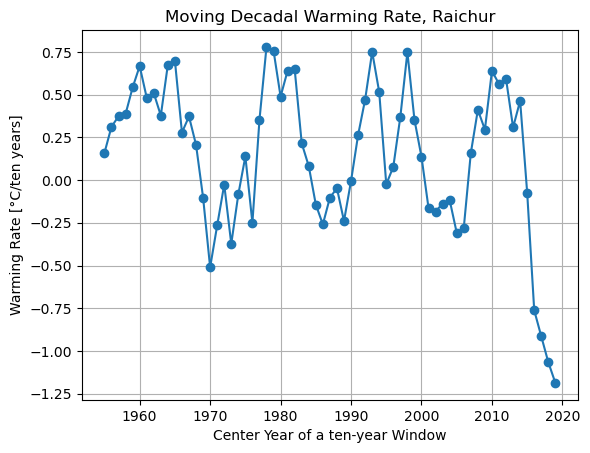

In [364]:
# 11.2 Plotting decadal warming rate
# Settings
df_t = tmax_raich_yearly_mean
time = 10 # 20 for 20-year window of warming ect.
time_string = "ten" # same as above, used for the plot title
location = "Raichur"
# End settings

decadal_trends = moving_decadal_rate(df_t, window=time)
print(decadal_trends)

plt.plot(decadal_trends['Year'], decadal_trends['DecadalWarmingRate'], marker='o')
plt.xlabel(f'Center Year of a {time_string}-year Window')
plt.ylabel(f'Warming Rate [°C/{time_string} years]')
plt.title(f'Moving Decadal Warming Rate, {location}')
plt.grid(True)
plt.show()